In [1]:
import numpy as np
import math 

In [3]:
# constant variables in order to calculate the random movements of MMs
NUM_OF_MESSENGERS = 10000
DIFF_COEFFICIENT = 79.4
TIME_STEP = 0.0001 
SYMBOL_DURATION = 2
ITERATION_COUNT = SYMBOL_DURATION / TIME_STEP
DISTANCE = 10
# environment constants
d = 10 # nanometers
# random number generator params.
mean = 0 
sigma =  math.sqrt(2 * DIFF_COEFFICIENT * TIME_STEP) # standard deviation


In [8]:
def simulate_diffusion(additional_flow):
    # set initial positions 
    mm_positionx = np.zeros(NUM_OF_MESSENGERS)
    mm_positiony = np.zeros(NUM_OF_MESSENGERS)
    mm_positionz = np.zeros(NUM_OF_MESSENGERS)
    reached_molecules_counts = []
    # reached_molecules
    for i in range(int(20)):
        total = 0
        for j in range(int(1000)):
            # calculate random variables using normal distribution
            rnd_moves_x = np.random.normal(mean, sigma, NUM_OF_MESSENGERS)
            rnd_moves_y = np.random.normal(mean, sigma, NUM_OF_MESSENGERS)
            rnd_moves_z = np.random.normal(mean, sigma, NUM_OF_MESSENGERS)
            # move messenger molecules
            mm_positionx = np.add(mm_positionx, rnd_moves_x + additional_flow)
            mm_positiony = np.add(mm_positiony, rnd_moves_y)
            mm_positionz = np.add(mm_positionz, rnd_moves_z)
            # check x position
            reached_molecules_count = np.sum(np.where(mm_positionx >= 10.0, 1, 0))
            # mark the reached ones by setting x pos to minimum
            mm_positionx = np.where(mm_positionx >= 10.0, -10000, mm_positionx)
            # append the total reached MMs in TIMESTEP
            total += reached_molecules_count
        reached_molecules_counts.append(total)
    return reached_molecules_counts


In [9]:
# plot the results...
%matplotlib inline
import matplotlib.pyplot as plt


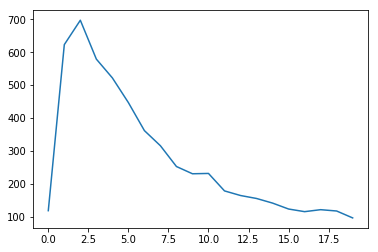

In [10]:
plt.figure()
plt.plot(simulate_diffusion(0))

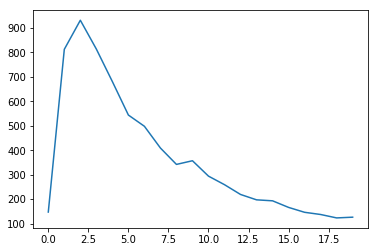

In [11]:
plt.figure()
plt.plot(simulate_diffusion(5 * 0.0001))

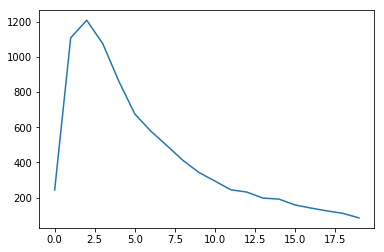

In [12]:
plt.figure()
plt.plot(simulate_diffusion(10 * 0.0001))